In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
import calendar
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from datetime import date
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
'''
load CSV
'''
df = pd.read_csv('training_data.csv',encoding = "ISO-8859-1")
df.columns
df_test = pd.read_csv('test_data.csv',encoding = "ISO-8859-1")
df_test.columns

Index(['city_name', 'record_date', 'AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION',
       'AVERAGE_RAIN'],
      dtype='object')

In [3]:
df.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [6]:
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
print(df.record_date)

0       2019-08-29 07:00:00
1       2018-08-10 14:00:00
2       2019-09-01 16:00:00
3       2019-02-26 11:00:00
4       2019-06-06 12:00:00
               ...         
6807    2019-02-23 09:00:00
6808    2019-06-08 18:00:00
6809    2018-10-02 04:00:00
6810    2019-01-30 01:00:00
6811    2019-06-15 21:00:00
Name: record_date, Length: 6812, dtype: object


In [7]:
def findDay(date):
    day = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    return day

In [8]:
aux = []
my_list = df.record_date
for date in my_list:
    x = date.split(" ")[0]
    # print(x)
    aux.append(findDay(x))
    # print(aux)
df["WEEK_DAY"] = aux

aux_test = []
my_list_test = df_test.record_date
for date_test in my_list_test:
    x_test = date_test.split(" ")[0]
    # print(x_test)
    aux_test.append(findDay(x_test))
    # print(aux_test)
df_test["WEEK_DAY"] = aux_test

In [9]:
'''
missing data
'''
df.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
WEEK_DAY                   False
dtype: bool

<AxesSubplot:>

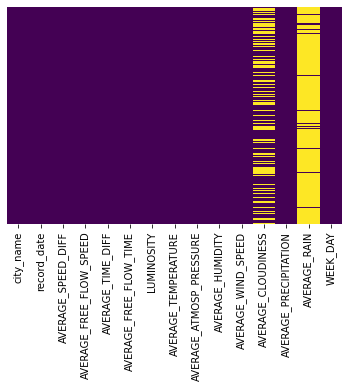

In [10]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [65]:
df.duplicated().sum()

5

In [11]:
#filling missing value (just 1 column) using fillna() and using the next value
df['AVERAGE_CLOUDINESS'].fillna(method = 'bfill')

0              céu claro
1              céu claro
2              céu claro
3              céu claro
4       nuvens dispersas
              ...       
6807           céu claro
6808           céu claro
6809           céu claro
6810      algumas nuvens
6811                 NaN
Name: AVERAGE_CLOUDINESS, Length: 6812, dtype: object

In [12]:
df['AVERAGE_RAIN'].fillna(method = 'bfill')

0       chuva fraca
1       chuva fraca
2       chuva fraca
3       chuva fraca
4       chuva fraca
           ...     
6807            NaN
6808            NaN
6809            NaN
6810            NaN
6811            NaN
Name: AVERAGE_RAIN, Length: 6812, dtype: object

In [13]:
#interpolating
df['AVERAGE_CLOUDINESS'].interpolate(method = 'linear', limit_direction = 'foward')

0                  NaN
1            céu claro
2                  NaN
3            céu claro
4                  NaN
             ...      
6807         céu claro
6808               NaN
6809         céu claro
6810    algumas nuvens
6811               NaN
Name: AVERAGE_CLOUDINESS, Length: 6812, dtype: object

In [14]:
df['AVERAGE_RAIN'].interpolate(method = 'linear', limit_direction = 'foward')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6807    NaN
6808    NaN
6809    NaN
6810    NaN
6811    NaN
Name: AVERAGE_RAIN, Length: 6812, dtype: object

In [15]:
#drop row with at leats one missing value
df.dropna(axis = 1, how = 'any')

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,WEEK_DAY
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,3
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,4
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,6
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,1
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Porto,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,0.0,5
6808,Porto,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,0.0,5
6809,Porto,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,0.0,1
6810,Porto,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,0.0,2


In [16]:
df_test.dropna(axis = 1, how = 'any')

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,WEEK_DAY
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,0.0,2
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,0.0,2
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,0.0,1
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,0.0,5
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Porto,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,0.0,5
1496,Porto,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,0.0,4
1497,Porto,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,0.0,2
1498,Porto,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,0.0,0


In [17]:
# remover as colunas que só tem 1 valor
df.drop(['city_name'], axis = 1, inplace = True)
df.drop(['record_date'], axis = 1, inplace = True)
df.drop(['AVERAGE_PRECIPITATION'], axis = 1, inplace = True)
df.drop(['AVERAGE_RAIN'], axis = 1, inplace = True) #muitos dados em falta
df_test.drop(['city_name'], axis = 1, inplace = True)
df_test.drop(['record_date'], axis = 1, inplace = True)
df_test.drop(['AVERAGE_PRECIPITATION'], axis = 1, inplace = True)
df_test.drop(['AVERAGE_RAIN'], axis = 1, inplace = True) #muitos dados em falta

In [18]:
# identificar todos os dados categóricos
cat_columns = list(df.select_dtypes(['object']).columns)
cat_columns.remove('AVERAGE_SPEED_DIFF')
print(cat_columns)

['LUMINOSITY', 'AVERAGE_CLOUDINESS']


In [19]:
# trnasformar dados categóricos em numéricos
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [20]:
unique = df.AVERAGE_SPEED_DIFF.unique()
print(unique)
convert_inv = {i: unique[i] for i in range(0,len(unique))}
convert = {unique[i]: i for i in range(0,len(unique))}
df.AVERAGE_SPEED_DIFF = [convert[i] for i in df.AVERAGE_SPEED_DIFF]

['Medium' 'High' 'None' 'Low' 'Very_High']


In [21]:
#decision tree classifier
#creating x (input data) and y (target feature - the AVERAGE_SPEED_DIFF feature)
x = df.drop(['AVERAGE_SPEED_DIFF'], axis = 1) #input features - everything except the AVERAGE_SPEED_DIFF feature
y = df['AVERAGE_SPEED_DIFF'].to_frame() #target feature

In [22]:
x

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,WEEK_DAY
0,41.5,11.5,71.4,0,15.0,1019.0,100.0,3.0,-1,3
1,41.7,48.3,87.4,0,21.0,1021.0,53.0,5.0,0,4
2,38.6,38.4,85.2,0,26.0,1014.0,61.0,4.0,-1,6
3,37.4,61.0,94.1,0,18.0,1025.0,48.0,4.0,0,1
4,41.6,50.4,77.0,0,15.0,1008.0,82.0,10.0,-1,3
...,...,...,...,...,...,...,...,...,...,...
6807,41.2,3.7,86.9,0,9.0,1030.0,71.0,4.0,0,5
6808,38.9,51.9,76.9,0,17.0,1020.0,63.0,6.0,-1,5
6809,39.6,0.0,89.1,2,15.0,1020.0,39.0,4.0,0,1
6810,41.6,0.0,85.5,2,8.0,1018.0,81.0,1.0,4,2


In [23]:
y

,AVERAGE_SPEED_DIFF
0,0
1,1
2,1
3,1
4,0
...,...
6807,3
6808,0
6809,2
6810,2


In [24]:
# train/test slipt
# usar x e y que contém 6812 linhas de data para criar train e test sets de data
# Importante -> Definir a random_state para reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2021)

In [25]:
print("The sape of x %s. x_train has shape %s while x_test has shape %s" %(x.shape, x_train.shape, x_test.shape))

The sape of x (6812, 10). x_train has shape (5109, 10) while x_test has shape (1703, 10)


In [26]:
print("The sape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The sape of y (6812, 1). y_train has shape (5109, 1) while y_test has shape (1703, 1)


In [27]:
clf = DecisionTreeClassifier(random_state = 2021)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
# confusion matrix-based metrics 
confusion_matrix(y_test, predictions)

array([[246,  74,   9,  73,   1],
       [ 55, 197,   0,   3,  19],
       [ 11,   0, 479,  78,   0],
       [ 54,   6,  84, 188,   0],
       [  2,  32,   0,   0,  92]])

In [28]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.71 accuracy


<AxesSubplot:>

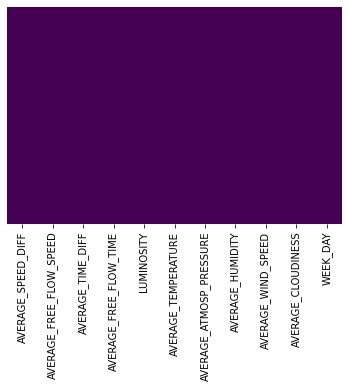

In [29]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

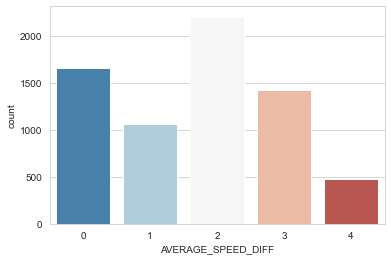

In [30]:
sns.set_style('whitegrid')
sns.countplot(x = 'AVERAGE_SPEED_DIFF', data = df, palette = 'RdBu_r')

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

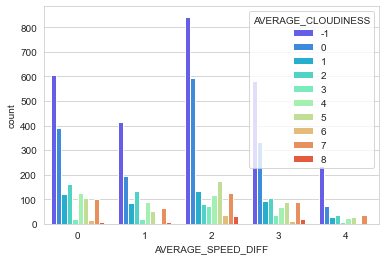

In [31]:
sns.set_style('whitegrid')
sns.countplot(x = 'AVERAGE_SPEED_DIFF', hue = 'AVERAGE_CLOUDINESS', data = df, palette = 'rainbow')

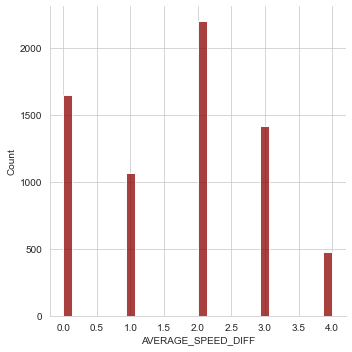

In [32]:
sns.displot(df['AVERAGE_SPEED_DIFF'].dropna(), kde = False, color = 'darkred', bins = 30)

<AxesSubplot:xlabel='LUMINOSITY', ylabel='count'>

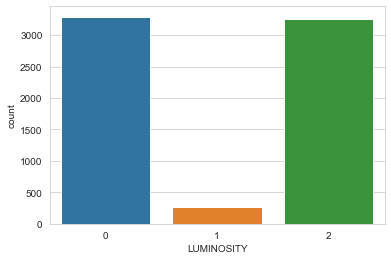

In [33]:
sns.countplot(x = 'LUMINOSITY', data = df)

<AxesSubplot:xlabel='AVERAGE_WIND_SPEED', ylabel='count'>

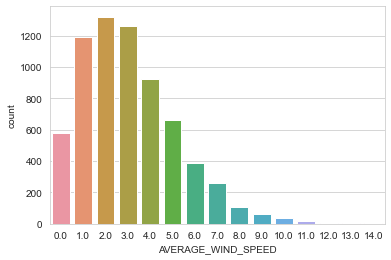

In [34]:
sns.countplot(x = 'AVERAGE_WIND_SPEED', data = df)

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE', ylabel='count'>

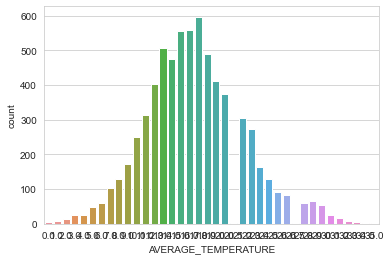

In [35]:
sns.countplot(x = 'AVERAGE_TEMPERATURE', data = df)

<AxesSubplot:>

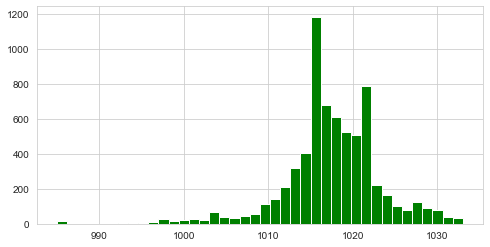

In [36]:
df['AVERAGE_ATMOSP_PRESSURE'].hist(color = 'green', bins = 40, figsize = (8,4))

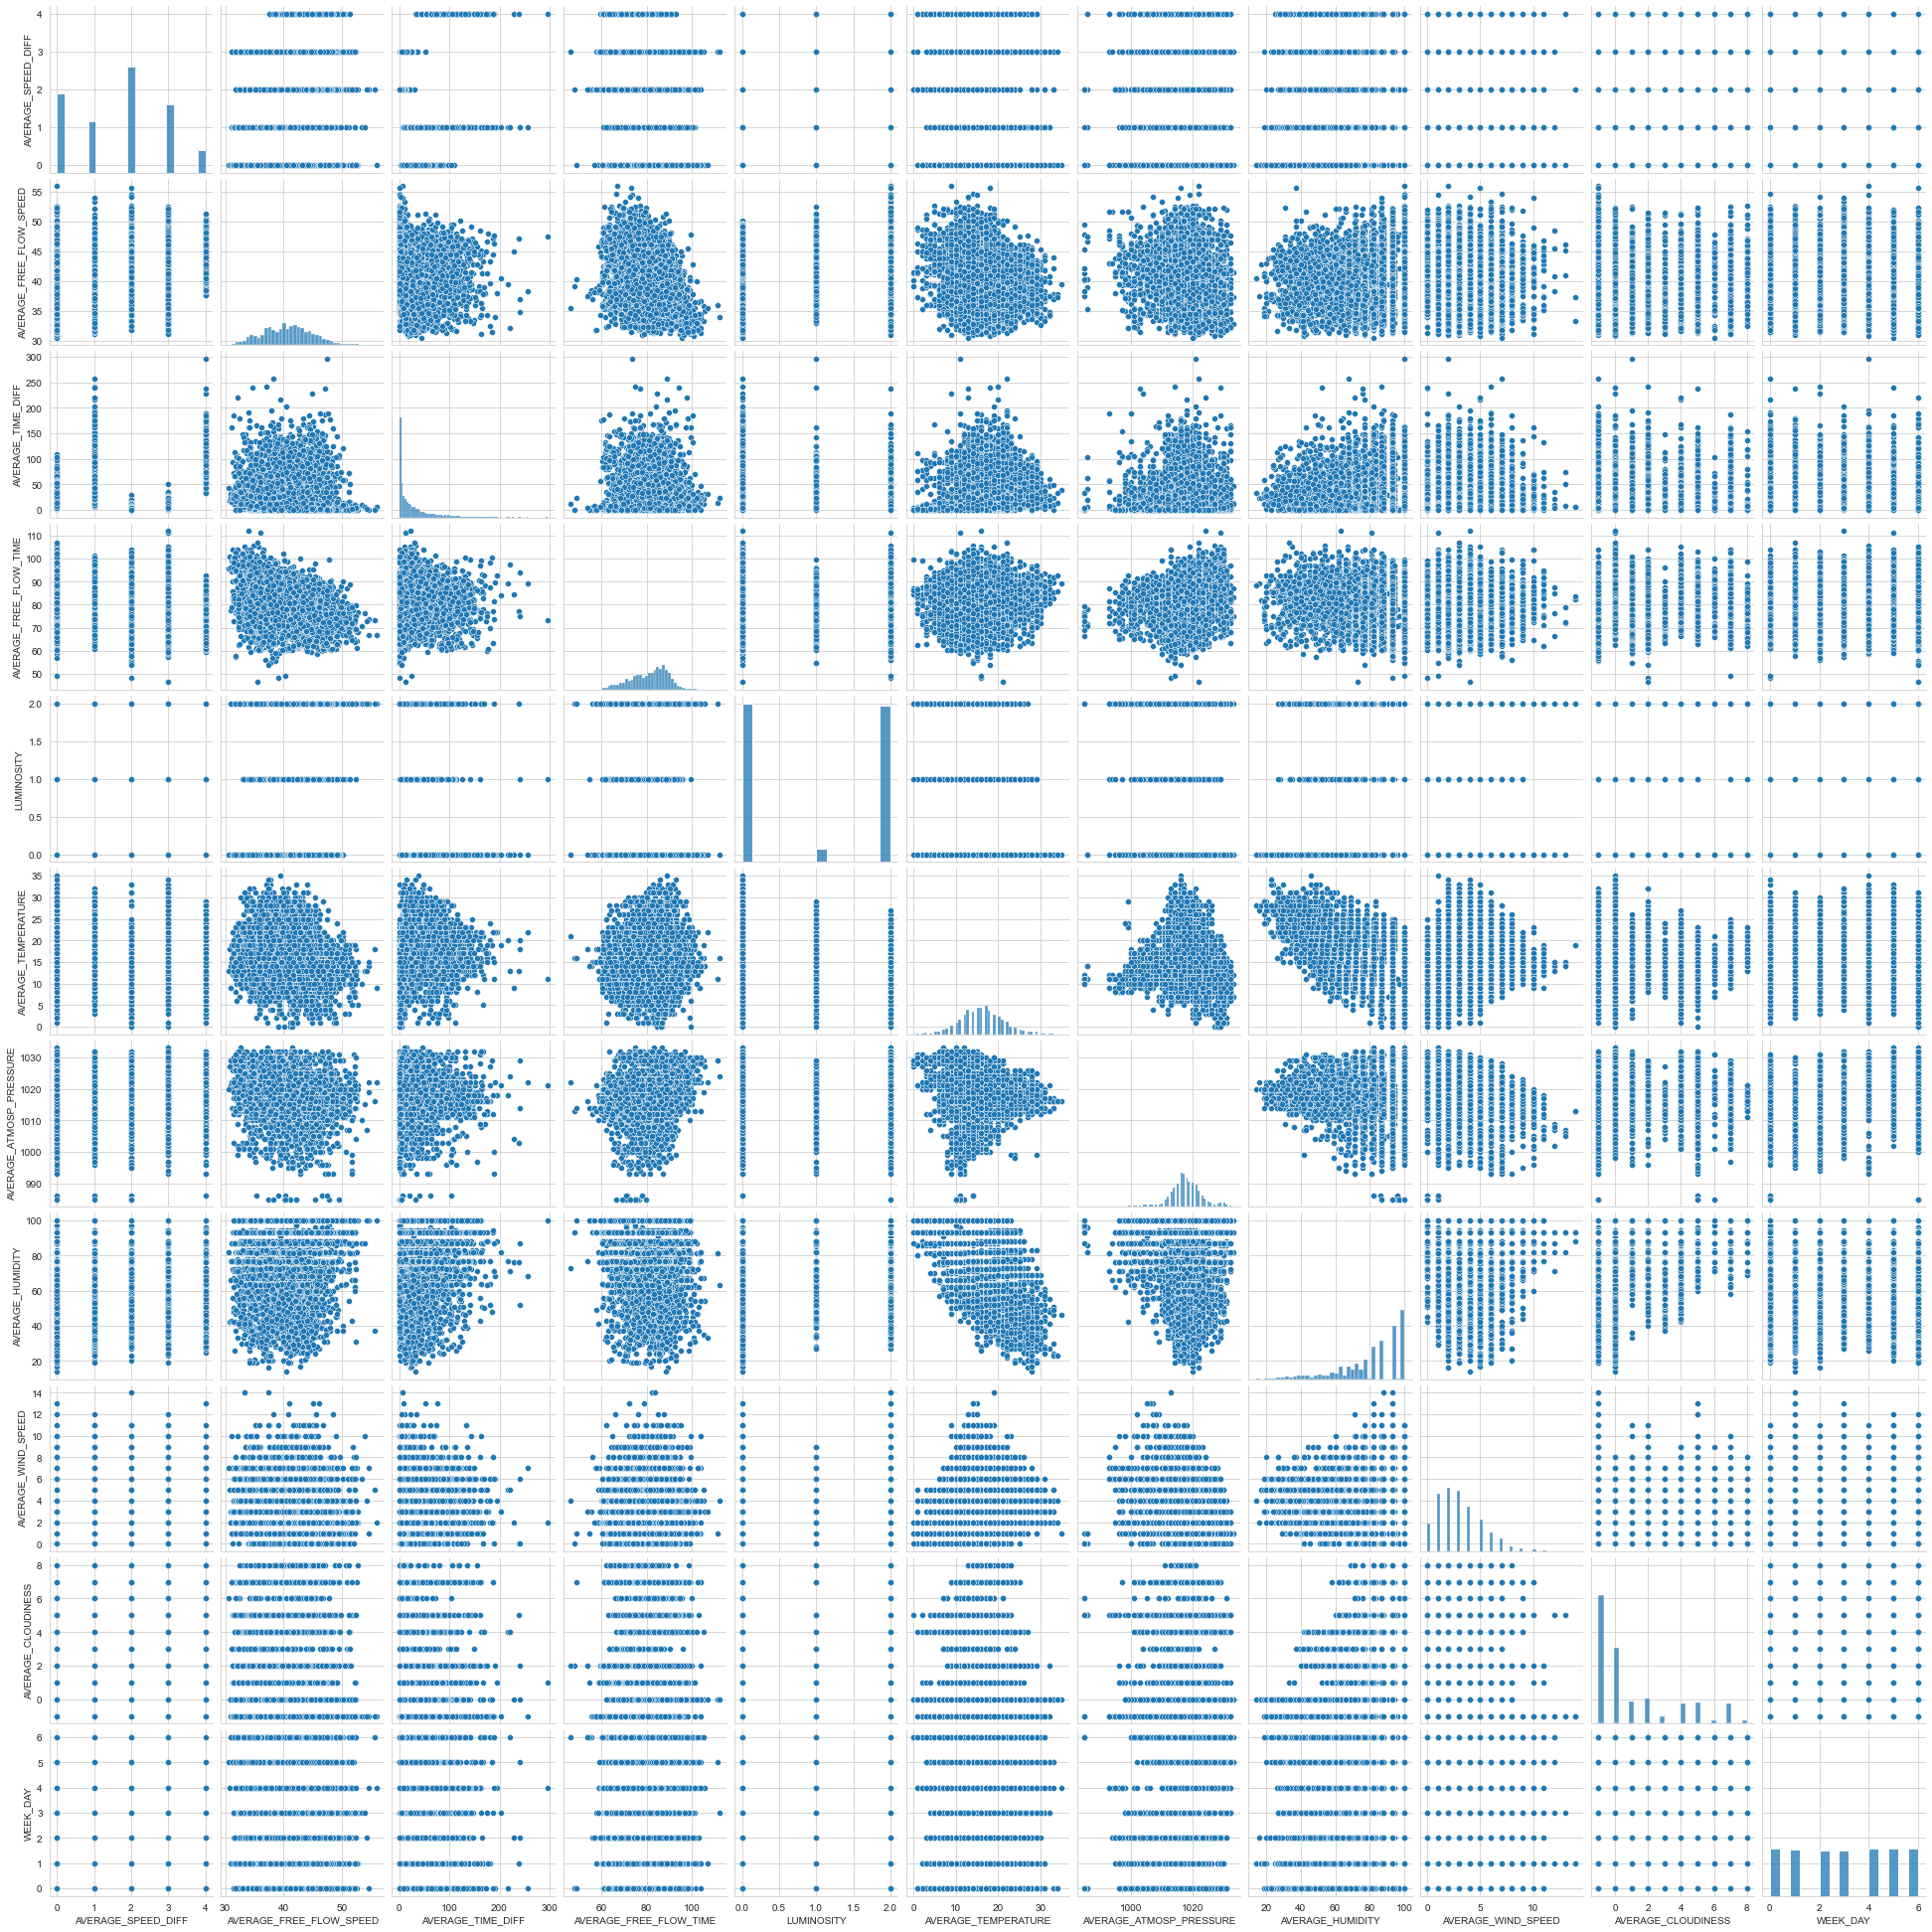

In [37]:
sns.pairplot(df)

<AxesSubplot:xlabel='AVERAGE_CLOUDINESS', ylabel='AVERAGE_SPEED_DIFF'>

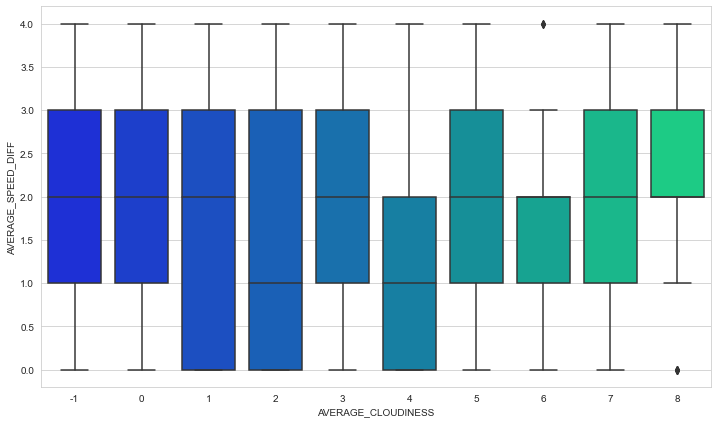

In [38]:
# Data cleaning
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'AVERAGE_CLOUDINESS', y = 'AVERAGE_SPEED_DIFF', data = df, palette = 'winter')

In [39]:
def inpute_AVERAGE_SPEED_DIFF(cols):
    AVERAGE_SPEED_DIFF = cols[0]
    AVERAGE_CLOUDINESS = cols[1]
    
    if pd.isnull(AVERAGE_SPEED_DIFF):
        
        if AVERAGE_CLOUDINESS == 1:
            return 37
        
        elif AVERAGE_CLOUDINESS == 2:
            return 29
        
        else:
            return 24
        
    else:
        return AVERAGE_SPEED_DIFF

In [40]:
df['AVERAGE_SPEED_DIFF'] = df[['AVERAGE_SPEED_DIFF', 'AVERAGE_CLOUDINESS']].apply(inpute_AVERAGE_SPEED_DIFF, axis = 1)

<AxesSubplot:>

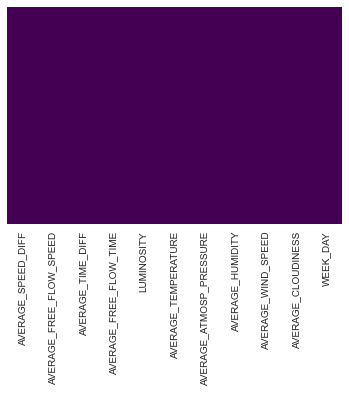

In [41]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   int64  
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   int64  
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   int64  
 10  WEEK_DAY                 6812 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 585.5 KB


In [43]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('AVERAGE_SPEED_DIFF', axis = 1), df[['AVERAGE_SPEED_DIFF']], test_size = 0.25, random_state = 101)

In [44]:
logmodel = LogisticRegression()
logmodel.fit(x_train, np.ravel(y_train))

/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions = logmodel.predict(x_test)

In [46]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.74 accuracy


In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       390
           1       0.68      0.61      0.64       268
           2       0.82      0.93      0.87       605
           3       0.67      0.58      0.62       349
           4       0.70      0.57      0.63        91

    accuracy                           0.74      1703
   macro avg       0.71      0.68      0.69      1703
weighted avg       0.73      0.74      0.73      1703



/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


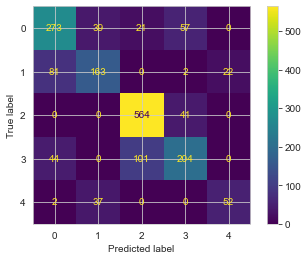

In [48]:
# Get the confusion matrix
plot_confusion_matrix(logmodel, x_test,y_test)
plt.show()

In [49]:
df.keys()

Index(['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'WEEK_DAY'],
      dtype='object')

In [50]:
model = SVC(random_state = 2021)

In [51]:
model.fit(x_train, np.ravel(y_train))

SVC(random_state=2021)

In [52]:
predictions = model.predict(x_test)

In [63]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.58 accuracy


/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


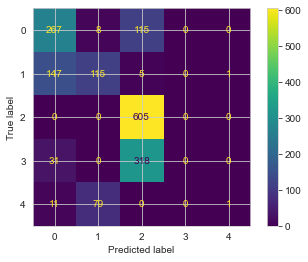

In [53]:
plot_confusion_matrix(model, x_test, y_test)

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       390
           1       0.57      0.43      0.49       268
           2       0.58      1.00      0.73       605
           3       0.00      0.00      0.00       349
           4       0.50      0.01      0.02        91

    accuracy                           0.58      1703
   macro avg       0.45      0.42      0.38      1703
weighted avg       0.46      0.58      0.48      1703



/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [55]:
param_grid = {'C': [1000], 'gamma': [0.0001], 'kernel': ['rbf']}

In [56]:
grid = GridSearchCV(SVC(random_state = 2021), param_grid, refit = True, verbose = 3)

In [57]:
grid.fit(x_train, np.ravel(y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.769 total time=   0.9s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.762 total time=   0.8s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.8s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.793 total time=   1.5s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.779 total time=   0.9s


GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [1000], 'gamma': [0.0001], 'kernel': ['rbf']},
             verbose=3)

In [58]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [59]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001, random_state=2021)

/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


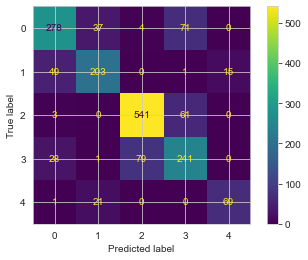

In [60]:
plot_confusion_matrix(grid, x_test, y_test)

In [61]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       390
           1       0.77      0.76      0.77       268
           2       0.87      0.89      0.88       605
           3       0.64      0.69      0.67       349
           4       0.82      0.76      0.79        91

    accuracy                           0.78      1703
   macro avg       0.78      0.76      0.77      1703
weighted avg       0.78      0.78      0.78      1703



In [64]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.58 accuracy


In [62]:
test_prediction = logmodel.predict(df_test)
temp = []
for ele in test_prediction:
    temp.append(convert_inv[ele])

data = {
    "RowId": range(1,len(temp)+1),
    "Speed_Diff": temp
}
result = pd.DataFrame.from_dict(data)
result.to_csv("submission.csv", index = False)